<a href="https://colab.research.google.com/github/SandeepChudali2000/Water_Quality_Prediction/blob/main/Water_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data from kaggle site 

In [56]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt


In [57]:
df=pd.read_csv("/content/water_potability.csv") # importing data 

In [58]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Cleaning
* Maupulation of data
* Data biending
* Missing value handling

In [59]:
df.info() # Showing the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Visiualizing Missing Data

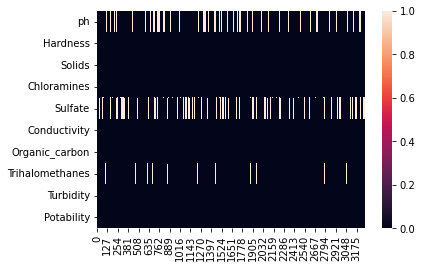

In [60]:
sns.heatmap(df.isna().transpose()) 

In [61]:
df.isna().sum()/len(df)*100 # finding the missing value in percentage

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [62]:
df.fillna(df.mean(),inplace=True) # filling missing value with the mean value

In [63]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploring Data  Analysis

### Checking for dimensionility reduction

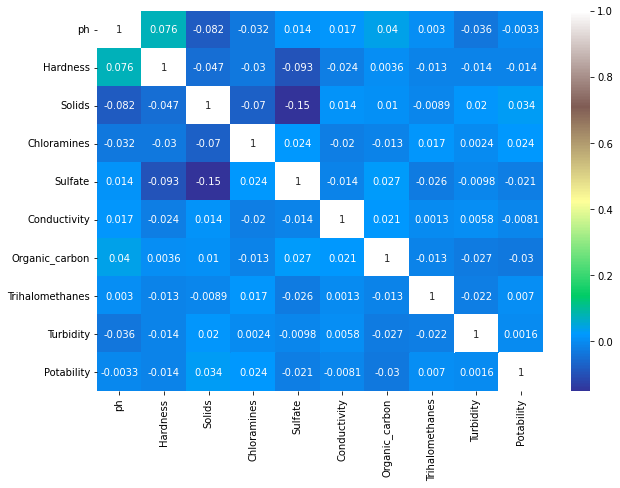

In [64]:
sns.heatmap(df.corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

### Checking outlier using boxplot

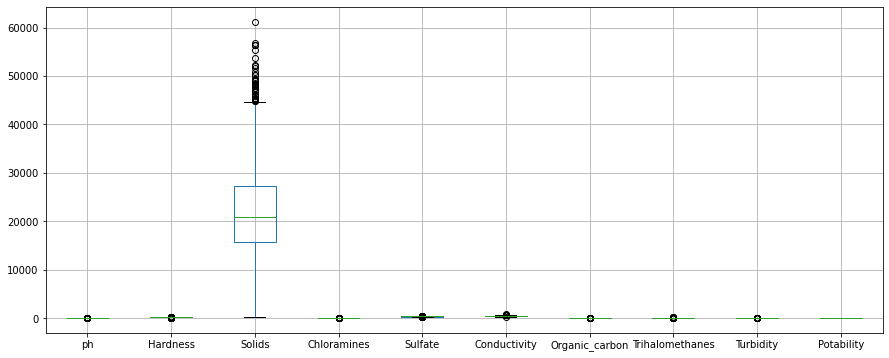

In [65]:
df.boxplot(figsize=(15,6))
plt.show()

* In the box plot we found outlier in the solids and we are not remove this outlier because it helps to identify either the water is good or bad.if we remove the oulier it is difficult to identify the bad water quality.

Plot value counts of each cateogry on Potability feature.

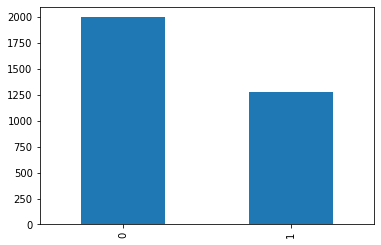

In [66]:
df.Potability.value_counts().plot.bar()
plt.show()

* Good water data is less than the bad water data

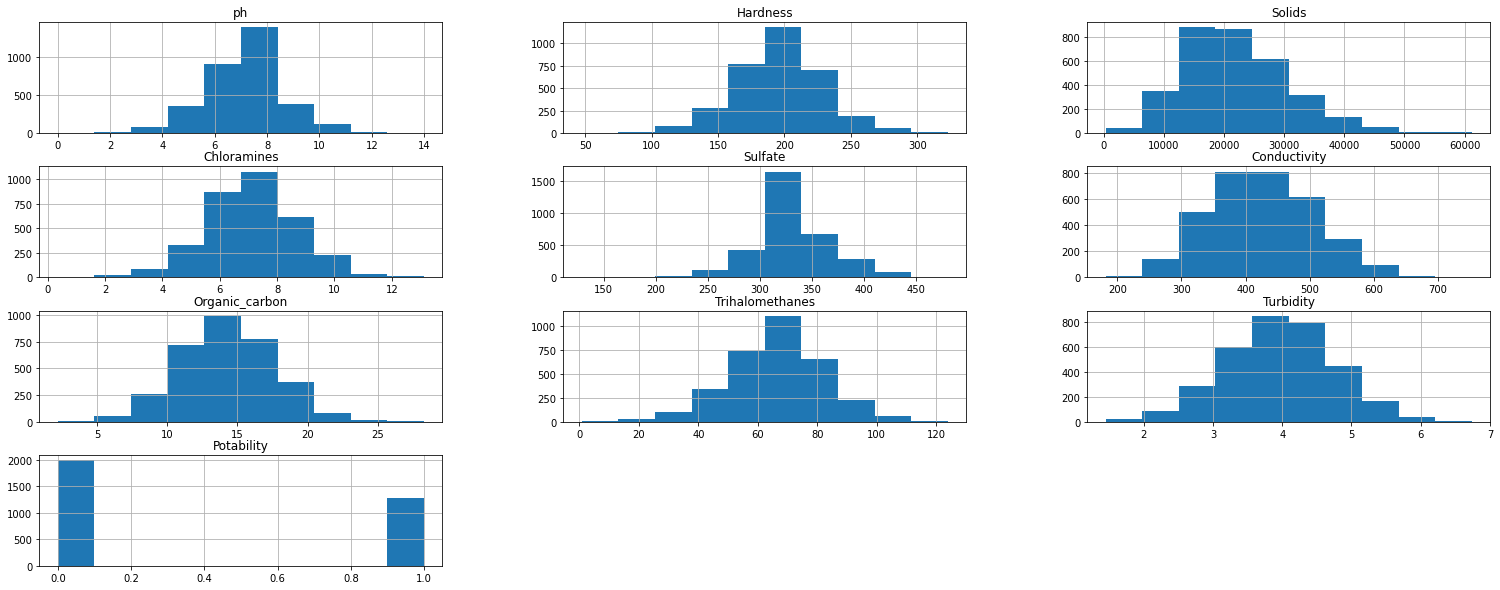

In [67]:
df.hist(figsize=(26,10))
plt.show()

*  All the input variable are normally distributed

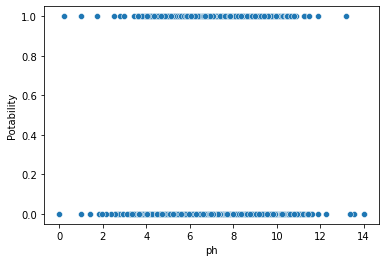

In [68]:
sns.scatterplot(x=df['ph'],y=df['Potability'])
plt.show()

* The raise of ph value raises the quality of water except some exception

# Train Test Split Data

In [69]:
X=df.drop('Potability',axis=1)

In [70]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [71]:
y=df['Potability']

In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [75]:
x_train.shape,y_train.shape

((2620, 9), (2620,))

In [76]:
x_test.shape,y_test.shape

((656, 9), (656,))

#Modeling Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model=LogisticRegression(max_iter=1000)

In [79]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [80]:
y_pred=model.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [82]:
confusion_matrix(y_pred,y_test)

array([[395, 261],
       [  0,   0]])

In [83]:
accuracy_score(y_test,y_pred)

0.6021341463414634

In [84]:
precision_score(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [85]:
recall_score(y_test,y_pred)

0.0

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       395
           1       0.00      0.00      0.00       261

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.36      0.60      0.45       656



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
Decision_Tree_Model=DecisionTreeClassifier()

In [90]:
Decision_Tree_Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred=Decision_Tree_Model.predict(x_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       395
           1       0.50      0.50      0.50       261

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
Random_Forest_Model=RandomForestClassifier()

In [96]:
Random_Forest_Model.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
y_pred=Random_Forest_Model.predict(x_test)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       395
           1       0.63      0.33      0.43       261

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.65      0.66      0.62       656



# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[2,6,9],
    'max_features':['sqrt','log2'],
    'random_state':[10,20,30,40]
}

In [101]:
model=DecisionTreeClassifier()

In [102]:
cv=GridSearchCV(model,param_grid,cv=5)

In [103]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [104]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=10)

In [105]:
best_model=cv.best_estimator_

In [106]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=10)

In [107]:
y_pred=best_model.predict(x_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75       395
           1       0.61      0.14      0.23       261

    accuracy                           0.62       656
   macro avg       0.62      0.54      0.49       656
weighted avg       0.62      0.62      0.54       656

